<a href="https://colab.research.google.com/github/rodrigomeireles/notebooks/blob/main/EDPs_El%C3%ADpiticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Meireles de Oliveira

Declaro este trabalho como domínio público.

## Método de Diferenças Finitas para Equações Elípticas
Dado um problema do tipo: $$\nabla^2{u(x,y)} = \frac{\partial^2 u}{\partial x^2}(x,y) + \frac{\partial^2 u}{\partial y^2}(x,y) = f(x,y) $$ numa região $R = \{(x,y) \mid a < x < b\, , c< y < d\}$, com $u(x,y) = g(x,y)$ para $(x,y)\in S$, onde $S$ é a fronteira de $R$.


Seja $w_{i,j}$ a aproximação numérica da função $u$ no ponto $(i,j)$, seja $h$ e $k$ o tamanho do intervalo usado na discretização de $x$ e $y$, respectivamente. Do método de diferenças finitas, utilizando uma grade regular e $\Delta x = \Delta y = h$ para a equação elíptica chegaremos na seguinte equação.
$$ w_{i,j} = \frac{w_{i+1, j} + w_{i-1, j} + w_{i, j+1} + w_{i, j-1}}{4} - \frac{h^2}{4}f(x_i, y_j)$$
para cada $i = 1,2, ...,n-1$ e $j = 1,2, ..., m-1$ e nos pontos de fronteira temos:
$$ w_{0, j} = g(x_0, y_j)\quad \text{e} \quad w_{n,j} = g(x_n, y_j) \quad \text{para cada $j=0,1,...,m$}\\ w_{i, 0} = g(x_i, y_0) \quad \text{e} \quad w_{i,m} = g(x_i, y_m) \quad \text{para cada $i = 1,2,...,n-1$}$$


Exercício 1 temos:
$$ u_{xx} + u_{yy} = x, \quad 0<x<1 \quad 0 < y < 1$$
com condições:
$$ u(x, 0) = u(x, 1) = \frac{x^3}{6}\\ u(0, y) = 0, \quad u(1,y) = \frac{1}{6}$$

In [ ]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#iterações máxima
maxiter = 500
Lx = 1
Ly = 1
n=m= 20 #número de intervalos da grade
h = Lx/n
k = Ly/m
x = linspace(0, 1, num=n+1)
y = linspace(0,1, num=m+1)

#condições de contorno
x_boundary = lambda x: x**3/6
y_left = 0
y_right = 1/6
f = lambda x, y: x
#criando e preenchendo a grade com zeros
W = empty((m+1, n+1))
W.fill(0)
#condições de contorno
W[:, 0] = y_left
W[:, -1] = y_right 
W[0, :] = W[-1, :] = x_boundary(x)
X, Y = meshgrid(x, y)
print(f(x,y))

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


Visualizando condições iniciais:

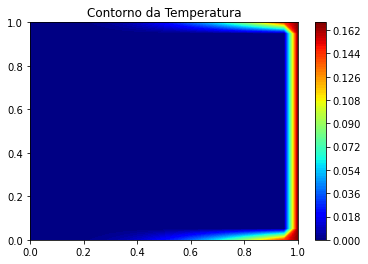

In [ ]:
# colourinterpolation fixa uma quantidade de cores para serem interpoladas no gráfico
# Alterar o valor deixará a figura com um degradê de cores mais ou menos contínuas.
# Uma função alternativa para mapear as cores seria: colourMap = plt.cm.coolwarm
colorinterpolation = 100
colourMap = plt.cm.jet
def ploteliptica(W):
  # Configura o contorno da temperatura com um degradê e uma função para mapear o espectro de cores.
  plt.title("Contorno da Temperatura")
  plt.contourf(X, Y, W, colorinterpolation, cmap=colourMap)

  # Fixa a barra lateral para identificar as temperaturas pela cor
  plt.colorbar()
  plt.show()
ploteliptica(W)

Definindo a função de iteração:

In [ ]:
def finite_diff(W, h,  maxiter):
  for iter in range(maxiter):
    for i in range(1, m):
      for j in range(1, n):
        
        W[i,j] = 1/4*((W[i+1, j] + W[i-1, j] + W[i, j+1] + W[i, j-1]) - (h**2) *f(x[j], y[i]))
  return W


Resolvendo e visualizando nosso problema em específico:

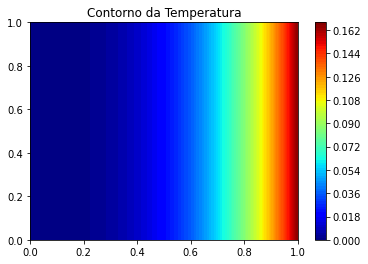

In [ ]:
W = finite_diff(W, h, maxiter)
ploteliptica(W)

No segundo problema temos: $$ u_{xx} + u_{yy} = -2-\pi^2 \sinh{\pi}\sin{\pi y}\quad 0<x<1 \quad\text{e}\quad 0<y<1$$ com condições: $$u(x,0) = u(x,1) = x(1-x) \\ u(0,y) = u(1,y) = \sinh{\pi}\sin{\pi y} $$ com solução analítica $u(x,y) = \sinh{y}\sinh{\pi y} + x(1-x)$.

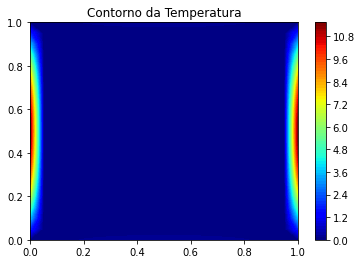

In [ ]:
W.fill(0)
#condições de contorno
x_boundary = lambda x: x*(1-x)
y_boundary = lambda y: sinh(pi)*sin(pi*y)
f = lambda x, y: -2-pi**2 * sinh(pi)*sin(pi*y)
W[0, :] = W[-1, :] = x_boundary(x)
W[:, 0] = W[:, -1] = y_boundary(y)
#condição inicial visualizada
ploteliptica(W)

Resolvendo e visualizando:

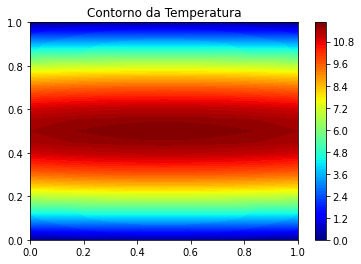

In [ ]:
W = finite_diff(W, h, maxiter)
ploteliptica(W)

Comparando com a solução analítica:

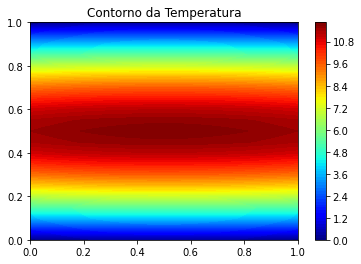

In [ ]:
anal = lambda x, y:sinh(pi)*sin(pi*y)+x*(1-x)
sol_anal = anal(X, Y)
ploteliptica(sol_anal)

No terceiro problema temos: $$ u_{xx} + u_{yy} = -[\cos{(x+y)} + \cos{(x-y)}]\quad 0<x<\pi \quad 0<y<\frac{\pi}{2}$$ com condições: $$u(x,0) = \cos{x} \quad u(x, \pi/2) = 0\\ u(0,y) = \cos{y} \quad u(\pi, y) = -\cos{y}$$ com solução analítica $u(x,y) = \cos{x}\cos{y}$

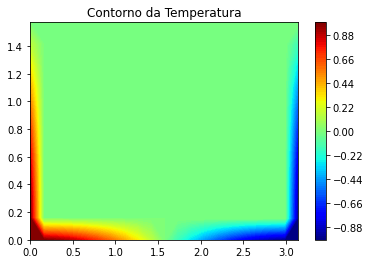

In [ ]:
#devemos ter dx = dy
Lx = pi
Ly = pi/2
n = 20
m = int(n/2)
h = Lx/n
x = linspace(0,Lx, num=n+1)
y = linspace(0,Ly, num=m+1)
#condições iniciais
left = cos(y)
right = -cos(y)
top = 0
bot = cos(x)
W = zeros((m+1, n+1))
f = lambda x, y: -(cos(x+y) + cos(x-y))

W[:,0] = left
W[:, -1] = right
W[-1, :] = top
W[0, :] = bot
X, Y = meshgrid(x,y)
ploteliptica(W)

Aproximando:

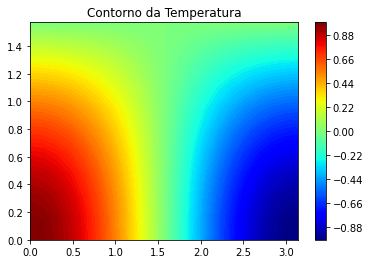

In [ ]:
W = finite_diff(W, h, maxiter)
ploteliptica(W)

Comparando com a solução analítica:

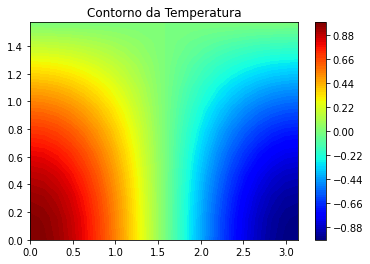

In [ ]:
anal = lambda x, y: cos(x)*cos(y)
sol_anal = anal(X,Y)
ploteliptica(sol_anal)